-------------------------------------

# Conclusions 

- PCA retaining 95% seems to perform slighly below baselines

## Imports

In [ ]:
#!pip install imbalanced-learn

In [ ]:

########################### (https://github.com/curiousily/TensorFlow-on-Android-for-Human-Activity-Recognition-with-LSTMs/blob/master/human_activity_recognition.ipynb) imports
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42


from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel

from sklearn.utils import shuffle

from matplotlib.pyplot import figure

from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier

from sklearn.decomposition import PCA

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Upload Data 

---------------------------------



Train

In [ ]:
from google.colab import files
uploaded_signal_train = files.upload()

Saving 28_2_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP to 28_2_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP
Saving 28_3_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP to 28_3_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP
Saving 28_4_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP to 28_4_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP
Saving 28_5_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP to 28_5_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP
Saving 28_6_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP to 28_6_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP
Saving 29_2_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP to 29_2_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP
Saving 29_3_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP to 29_3_Participant_SlideSize_10_Handcrafted_Feat

Test

In [ ]:
from google.colab import files
uploaded_signal_test = files.upload()

Saving 28_7_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP to 28_7_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP
Saving 28_8_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP to 28_8_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP
Saving 29_7_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP to 29_7_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP
Saving 29_8_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP to 29_8_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP
Saving 32_7_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP to 32_7_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP
Saving 32_8_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP to 32_8_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP
Saving 33_7_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_LJP to 33_7_Participant_SlideSize_10_Handcrafted_Feat

### Reading in segments & labels

Train

In [ ]:
# getting keys, which is file names of npy 
list_of_dataframes_train = [key for key in uploaded_signal_train.keys()]


# set up list to hold all loaded npy 
all_dataframe_train = [] 


for i in range(len(list_of_dataframes_train)):

    # load in the data 
    dataframe_train = pd.read_csv(list_of_dataframes_train[i])


    # append the data to 'all' list
    all_dataframe_train.append(dataframe_train) 


all_df_train = pd.concat(all_dataframe_train)

Test

In [ ]:
# getting keys, which is file names of npy 
list_of_dataframes_test = [key for key in uploaded_signal_test.keys()]


# set up list to hold all loaded npy 
all_dataframe_test = [] 


for i in range(len(list_of_dataframes_test)):

    # load in the data 
    dataframe_test = pd.read_csv(list_of_dataframes_test[i])


    # append the data to 'all' list
    all_dataframe_test.append(dataframe_test) 


all_df_test = pd.concat(all_dataframe_test)


# Quick Look 

In [ ]:
all_df_train.head()

,Unnamed: 0,X_Mean_Acc_Move,Y_Mean_Acc_Move,Z_Mean_Acc_Move,X_Mean_Magnet,Y_Mean_Magnet,Z_Mean_Magnet,Pitch_Mean_Gyro,Roll_Mean_Gyro,Yaw_Mean_Gyro,X_Acc_Move_FFT_EnergyBands,Y_Acc_Move_FFT_EnergyBands,Z_Acc_Move_FFT_EnergyBands,X_Acc_Move_FFT_DominantFrequency,Y_Acc_Move_FFT_DominantFrequency,Z_Acc_Move_FFT_DominantFrequency,X_Acc_Move_FFT_MaxPower,Y_Acc_Move_FFT_MaxPower,Z_Acc_Move_FFT_MaxPower,X_Acc_Move_FFT_MeanWeightedFrequency,Y_Acc_Move_FFT_MeanWeightedFrequency,Z_Acc_Move_FFT_MeanWeightedFrequency,X_Acc_Move_FFT_SkewnessFrequency,Y_Acc_Move_FFT_SkewnessFrequency,Z_Acc_Move_FFT_SkewnessFrequency,X_Acc_Move_FFT_KurtosisFrequency,Y_Acc_Move_FFT_KurtosisFrequency,Z_Acc_Move_FFT_KurtosisFrequency,X_Magnet_ChangeOfSign,Y_Magnet_ChangeOfSign,Z_Magnet_ChangeOfSign,X_std_Acc_Move,Y_std_Acc_Move,Z_std_Acc_Move,X_std_Magnet,Y_std_Magnet,Z_std_Magnet,Pitch_std_Gyro,Roll_std_Gyro,Yaw_std_Gyro,...,Z_max_Magnet,Pitch_max_Gyro,Roll_max_Gyro,Yaw_max_Gyro,X_min_Acc_Move,Y_min_Acc_Move,Z_min_Acc_Move,X_min_Magnet,Y_min_Magnet,Z_min_Magnet,Pitch_min_Gyro,Roll_min_Gyro,Yaw_min_Gyro,SMA_Acc_Move,SMA_Magnet,SMA_Gyro,Energy_Acc_Move,Energy_Magnet,Energy_Gyro,X_iqr_Acc_Move,Y_iqr_Acc_Move,Z_iqr_Acc_Move,X_iqr_Magnet,Y_iqr_Magnet,Z_iqr_Magnet,Pitch_iqr_Gyro,Roll_iqr_Gyro,Yaw_iqr_Gyro,XY_corr_Acc_Move,XZ_corr_Acc_Move,YZ_corr_Acc_Move,XY_corr_Magnet,XZ_corr_Magnet,YZ_corr_Magnet,Pitch_Roll_corr_Gyro,Pitch_Yaw_corr_Gyro,Roll_Yaw_corr_Gyro,Label_segment,Participant_ID,Participant_Run
0,0,-0.345651,0.243621,-0.378761,-7.702587,-36.274094,6.544647,-0.001866,-0.004209,0.010049,[ 4.44089210e-16+0.j -1.36743098e-01-0...,[ 5.55111512e-16+0.j 6.02078568e-02-0...,[ 5.55111512e-16+0.j 6.02078568e-02-0...,10.0,10.0,10.0,0.226947,0.270919,0.270919,1.014269,1.463456,1.463456,1.014269,1.463456,1.463456,1.085933,0.136027,0.136027,0,0,0,0.032882,0.042589,0.044694,0.221493,0.374326,0.246606,0.001253,0.000584,0.000988,...,6.783730,-0.000156,-0.003209,0.011021,-0.393286,0.181635,-0.442786,-8.061852,-36.759109,6.201022,-0.003715,-0.005141,0.007720,0.968032,50.521328,0.016125,0.327178,1418.222109,0.000125,0.062303,0.065942,0.081665,0.338572,0.585278,0.494285,0.001920,0.000705,0.001263,0.493614,-0.501615,0.316065,-0.743477,-0.409541,0.266258,0.241051,0.162547,0.253310,Go,28,2
1,1,-0.319342,0.162098,-0.342011,-7.738424,-36.147514,6.689313,-0.001100,-0.004092,0.008219,[-2.22044605e-16+0.j 8.10724443e-02+0...,[-1.11022302e-16+0.j 1.73273293e-01-0...,[-1.11022302e-16+0.j 1.73273293e-01-0...,10.0,10.0,10.0,0.349178,0.331988,0.331988,1.409548,1.535443,1.535443,1.409548,1.535443,1.535443,1.111614,1.028266,1.028266,0,0,0,0.050333,0.048506,0.066542,0.257834,0.426416,0.117972,0.000964,0.000973,0.002203,...,6.783730,-0.000156,-0.002876,0.011021,-0.393286,0.091814,-0.442786,-8.061852,-36.771113,6.386037,-0.003107,-0.006575,0.004726,0.823451,50.575251,0.013411,0.254541,1411.535084,0.000092,0.090104,0.085942,0.099641,0.480858,0.823928,0.138442,0.000823,0.000870,0.003775,-0.686037,0.400664,-0.931307,-0.672780,0.220964,-0.295968,0.735916,0.368056,0.203087,Go,28,2
2,2,-0.271131,0.152904,-0.319191,-7.378853,-36.185124,6.572727,-0.000447,-0.003125,0.005925,[ 2.77555756e-17+0.j -1.63596684e-01-0...,[-2.77555756e-17+0.j -1.22561277e-01+0...,[-2.77555756e-17+0.j -1.22561277e-01+0...,10.0,10.0,10.0,0.166835,0.279101,0.279101,1.472690,0.708644,0.708644,1.472690,0.708644,0.708644,0.071999,1.012308,1.012308,0,0,0,0.027377,0.040053,0.049630,0.591822,0.368272,0.125559,0.001518,0.001659,0.000804,...,6.757243,0.001655,-0.000278,0.007255,-0.328298,0.091814,-0.400806,-7.994001,-36.771113,6.386037,-0.003107,-0.006575,0.004726,0.743226,50.136704,0.010305,0.203591,1407.513063,0.000051,0.038717,0.067301,0.069507,1.036439,0.670277,0.184128,0.001735,0.001489,0.001226,0.226927,-0.656599,-0.653995,-0.625427,0.540082,-0.179181,0.780441,-0.404743,-0.199011,Go,28,2
3,3,-0.249181,0.161472,-0.330511,-6.654501,-36.508391,6.678391,0.000861,-0.001989,0.005660,[-2.22044605e-16+0.j 6.36372285e-02+0...,[-9.71445147e-17

In [ ]:
all_df_test.head()

,Unnamed: 0,X_Mean_Acc_Move,Y_Mean_Acc_Move,Z_Mean_Acc_Move,X_Mean_Magnet,Y_Mean_Magnet,Z_Mean_Magnet,Pitch_Mean_Gyro,Roll_Mean_Gyro,Yaw_Mean_Gyro,X_Acc_Move_FFT_EnergyBands,Y_Acc_Move_FFT_EnergyBands,Z_Acc_Move_FFT_EnergyBands,X_Acc_Move_FFT_DominantFrequency,Y_Acc_Move_FFT_DominantFrequency,Z_Acc_Move_FFT_DominantFrequency,X_Acc_Move_FFT_MaxPower,Y_Acc_Move_FFT_MaxPower,Z_Acc_Move_FFT_MaxPower,X_Acc_Move_FFT_MeanWeightedFrequency,Y_Acc_Move_FFT_MeanWeightedFrequency,Z_Acc_Move_FFT_MeanWeightedFrequency,X_Acc_Move_FFT_SkewnessFrequency,Y_Acc_Move_FFT_SkewnessFrequency,Z_Acc_Move_FFT_SkewnessFrequency,X_Acc_Move_FFT_KurtosisFrequency,Y_Acc_Move_FFT_KurtosisFrequency,Z_Acc_Move_FFT_KurtosisFrequency,X_Magnet_ChangeOfSign,Y_Magnet_ChangeOfSign,Z_Magnet_ChangeOfSign,X_std_Acc_Move,Y_std_Acc_Move,Z_std_Acc_Move,X_std_Magnet,Y_std_Magnet,Z_std_Magnet,Pitch_std_Gyro,Roll_std_Gyro,Yaw_std_Gyro,...,Z_max_Magnet,Pitch_max_Gyro,Roll_max_Gyro,Yaw_max_Gyro,X_min_Acc_Move,Y_min_Acc_Move,Z_min_Acc_Move,X_min_Magnet,Y_min_Magnet,Z_min_Magnet,Pitch_min_Gyro,Roll_min_Gyro,Yaw_min_Gyro,SMA_Acc_Move,SMA_Magnet,SMA_Gyro,Energy_Acc_Move,Energy_Magnet,Energy_Gyro,X_iqr_Acc_Move,Y_iqr_Acc_Move,Z_iqr_Acc_Move,X_iqr_Magnet,Y_iqr_Magnet,Z_iqr_Magnet,Pitch_iqr_Gyro,Roll_iqr_Gyro,Yaw_iqr_Gyro,XY_corr_Acc_Move,XZ_corr_Acc_Move,YZ_corr_Acc_Move,XY_corr_Magnet,XZ_corr_Magnet,YZ_corr_Magnet,Pitch_Roll_corr_Gyro,Pitch_Yaw_corr_Gyro,Roll_Yaw_corr_Gyro,Label_segment,Participant_ID,Participant_Run
0,0,-0.682452,-1.537566,1.163282,-31.175807,15.108035,6.015167,0.937977,-0.072320,-0.046816,[-2.22044605e-16+0.j 1.53001337e-01+0...,[ 1.22124533e-15+0.j 1.22016169e+00+2...,[ 1.22124533e-15+0.j 1.22016169e+00+2...,20.0,10.0,10.0,0.643152,2.448863,2.448863,4.655601,14.411731,14.411731,4.655601,14.411731,14.411731,-0.661059,0.386908,0.386908,0,0,0,0.109038,0.380652,0.214096,0.662956,1.406793,0.416355,0.222151,0.088708,0.011931,...,6.772522,1.446242,-0.019637,-0.021178,-0.830064,-1.931298,0.771279,-32.231030,12.583961,5.367462,0.653755,-0.305338,-0.062037,3.383299,52.299009,1.057113,4.385696,1238.957808,0.944586,0.140295,0.525360,0.224491,0.294349,0.401318,0.453442,0.187720,0.022940,0.015471,0.666391,-0.695607,-0.953410,0.983856,0.946480,0.928574,-0.878817,0.824730,-0.600255,Go,28,7
1,1,-0.570402,-1.360722,1.709553,-32.287807,12.585200,5.150206,1.381306,-0.296202,-0.136848,[-7.21644966e-16+0.j 1.05372356e-01+0...,[ 2.77555756e-15+0.j -1.88132267e+00-1...,[ 2.77555756e-15+0.j -1.88132267e+00-1...,20.0,10.0,10.0,0.860700,2.244292,2.244292,9.321138,8.889377,8.889377,9.321138,8.889377,8.889377,-0.050429,0.711532,0.711532,0,0,0,0.151184,0.332196,0.796803,0.834394,2.198260,0.604916,0.315140,0.219459,0.140874,...,5.863824,1.718010,-0.023043,-0.021178,-0.829737,-1.874020,0.771279,-33.791976,7.878010,4.060401,0.901326,-0.633810,-0.448732,3.640678,50.023212,1.814355,5.867602,1233.308799,2.181790,0.219628,0.541532,1.328693,1.394364,3.066943,1.099722,0.590682,0.332308,0.122365,-0.061180,0.647081,-0.624960,0.984721,0.980586,0.951740,-0.906847,-0.608250,0.856768,Go,28,7
2,2,-0.432210,-1.553906,2.907824,-33.842049,8.614268,4.289888,1.360710,-0.788843,-0.515477,[ 8.60422844e-16+0.j -1.86008136e-01+0...,[0. +0.j 0.75013999-0.48745819j...,[0. +0.j 0.75013999-0.48745819j...,20.0,10.0,10.0,0.906017,0.894609,0.894609,9.525538,14.787252,14.787252,9.525538,14.787252,14.787252,0.162686,-0.369606,-0.369606,0,0,0,0.155728,0.212389,0.734981,1.065952,2.695428,0.457061,0.372331,0.351509,0.310274,...,5.337253,1.718010,-0.360445,-0.074735,-0.730284,-1.799700,1.278333,-35.322797,5.257983,3.845828,0.585038,-1.394647,-0.914100,4.893939,46.746205,2.665030,11.666423,1246.503540,3.097979,0.159782,0.112439,0.853469,1.991838,5.399224,0.637311,0.488967,0.584246,0.595479,-0.895770,0.851415,-0.958038,0.974470,0.860691,0.909989,0.948261,0.878602,0.979366,Go,28,7
3,3,-0.352377,-1.637925,3.038907,-35.772118,4.248740,4.181738,0.713154,-1.206948,-0.564155,[ 3.88578059e-16+0.j -2.15915596e-01-0...,[-1.33226763e-15+0.j

# Train Test Split 

In [ ]:
# Getting X_train & y_train'
X_train = all_df_train.drop(['Unnamed: 0' , 'Label_segment' , 'Participant_ID' , 'Participant_Run', 'X_Acc_Move_FFT_EnergyBands', 	'Y_Acc_Move_FFT_EnergyBands', 	'Z_Acc_Move_FFT_EnergyBands'	], axis = 1)
y_train = all_df_train['Label_segment'].values

In [ ]:
# Getting X_train & y_train
X_test = all_df_test.drop(['Unnamed: 0' , 'Label_segment' , 'Participant_ID' , 'Participant_Run',  'X_Acc_Move_FFT_EnergyBands', 	'Y_Acc_Move_FFT_EnergyBands', 	'Z_Acc_Move_FFT_EnergyBands'], axis = 1)
y_test = all_df_test['Label_segment'].values

---------------------------

Standard Scale 

In [ ]:
# Set up ss for non-shuffled data
ss = StandardScaler()


# fit train & transform test
X_train_scale = ss.fit_transform(X_train)
X_test_scale = ss.transform(X_test)

-----------------------------------------

In [ ]:
from sklearn.decomposition import PCA

# PCA set for 95% of variance 
pca = PCA(n_components=0.95)

pca.fit(X_train_scale)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# PCA set for 95% of variance  

X_train_scale_pca = pca.transform(X_train_scale)
X_test_scale_pca = pca.transform(X_test_scale)

# quick print of shapes to see difference
print(f'Train data:\nBefore pca shape: {X_train_scale.shape} , after pca applied: {X_train_scale_pca.shape} ')
print(f'\nTest data:\nBefore pca shape: {X_test_scale.shape} , after pca applied: {X_test_scale_pca.shape} ')



Train data:
Before pca shape: (83873, 87) , after pca applied: (83873, 35) 

Test data:
Before pca shape: (38687, 87) , after pca applied: (38687, 35) 


Check if SMOTE helps

In [ ]:
print(Counter(y_train))

Counter({'Turn 1': 3091, 'Turn 2': 2431, 'Walk 2': 1777, 'sit': 1627, 'Walk 1': 1522, 'Go': 745})


In [ ]:
# transform the dataset
oversample = SMOTE()
X_train_scale_smote, y_train_smote = oversample.fit_resample(X_train_scale_pca, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
print(Counter(y_train_smote))

Counter({'Go': 3091, 'Walk 1': 3091, 'Turn 1': 3091, 'Walk 2': 3091, 'Turn 2': 3091, 'sit': 3091})


In [ ]:
# quick print of shapes to see difference
print(f'Train data:\nBefore pca shape: {X_train_scale.shape} , after pca applied: {X_train_scale_smote.shape} ')


NameError: ignored

----------------------------------------------

# PCA - No SMOTE 

Check Some Classifiers 

In [ ]:
from sklearn.metrics import accuracy_score, log_loss , recall_score , f1_score, precision_score , roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier

classifiers = [
               
    # Too much computation to run now since using entire data and not segmenting on location 
    ##KNeighborsClassifier(),
    ##GradientBoostingClassifier(),
    ##LabelPropagation(),

    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LinearSVC(),
    SGDClassifier(),
    MLPClassifier(),
    PassiveAggressiveClassifier(),
    ExtraTreesClassifier(),
    BaggingClassifier(),
  
    
     ]


# list to hold for dataframe
classifier_name_list = []
train_acc_list = []
train_bacc_list = []
test_acc_list = []
test_bacc_list = []
train_recall_list = []
test_recall_list = []
train_precision_list = []
test_precision_list = []
train_f1_list = []
test_f1_list = []


for clf in classifiers:
    
    name = clf.__class__.__name__
    
    print("="*50)
    print(name)

    clf.fit(X_train_scale_pca, y_train)
    
    print('****Results****')

    # Test Predictions
    test_predictions = clf.predict(X_test_scale_pca)

    # Test Metrics
    acc            = accuracy_score(y_test, test_predictions)
    bal_acc        = balanced_accuracy_score(y_test, test_predictions)
    recall_test    = recall_score(y_test, test_predictions, average = 'weighted')
    f1_test        = f1_score(y_test, test_predictions ,  average = 'weighted')
    precision_test = precision_score(y_test, test_predictions,  average = 'weighted') 



    # Train Predictions
    train_predictions = clf.predict(X_train_scale_pca)

    # Train Metrics
    train_acc       = accuracy_score(y_train, train_predictions)
    train_bal_acc   = balanced_accuracy_score(y_train, train_predictions)
    recall_train    = recall_score(y_train, train_predictions , average = 'weighted')
    f1_train        = f1_score(y_train, train_predictions ,  average = 'weighted')
    precision_train = precision_score(y_train, train_predictions,  average = 'weighted') 

    print("\n\nTest Classification Report\n")
    print(classification_report(y_test, test_predictions))

    # append to list to make a dataframe 
    classifier_name_list.append(name)
    train_acc_list.append(train_acc)
    test_acc_list.append(acc)

    train_bacc_list.append(train_bal_acc)
    test_bacc_list.append(bal_acc)

    train_recall_list.append(recall_train)
    test_recall_list.append(recall_test)

    train_precision_list.append(precision_train)
    test_precision_list.append(precision_test)

    train_f1_list.append(f1_train)
    test_f1_list.append(f1_test)




print("="*50)




DecisionTreeClassifier
****Results****


Test Classification Report

              precision    recall  f1-score   support

          Go       0.46      0.41      0.44      2214
      Turn 1       0.47      0.48      0.47     10801
      Turn 2       0.48      0.45      0.46     10754
      Walk 1       0.26      0.27      0.26      4790
      Walk 2       0.32      0.31      0.32      6471
         sit       0.26      0.32      0.29      3657

    accuracy                           0.40     38687
   macro avg       0.38      0.37      0.37     38687
weighted avg       0.40      0.40      0.40     38687

RandomForestClassifier
****Results****


Test Classification Report

              precision    recall  f1-score   support

          Go       0.74      0.47      0.57      2214
      Turn 1       0.51      0.75      0.60     10801
      Turn 2       0.55      0.67      0.60     10754
      Walk 1       0.50      0.22      0.31      4790
      Walk 2       0.50      0.29      0.37     

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


****Results****


Test Classification Report

              precision    recall  f1-score   support

          Go       0.46      0.26      0.33      2214
      Turn 1       0.35      0.55      0.43     10801
      Turn 2       0.37      0.52      0.43     10754
      Walk 1       0.39      0.08      0.13      4790
      Walk 2       0.36      0.17      0.23      6471
         sit       0.45      0.18      0.25      3657

    accuracy                           0.37     38687
   macro avg       0.40      0.29      0.30     38687
weighted avg       0.38      0.37      0.34     38687

SGDClassifier
****Results****


Test Classification Report

              precision    recall  f1-score   support

          Go       0.25      0.38      0.30      2214
      Turn 1       0.35      0.44      0.39     10801
      Turn 2       0.34      0.24      0.28     10754
      Walk 1       0.22      0.06      0.10      4790
      Walk 2       0.26      0.13      0.17      6471
         sit       0.18   

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


****Results****


Test Classification Report

              precision    recall  f1-score   support

          Go       0.74      0.47      0.58      2214
      Turn 1       0.58      0.69      0.63     10801
      Turn 2       0.60      0.63      0.61     10754
      Walk 1       0.42      0.31      0.36      4790
      Walk 2       0.45      0.41      0.43      6471
         sit       0.46      0.46      0.46      3657

    accuracy                           0.54     38687
   macro avg       0.54      0.49      0.51     38687
weighted avg       0.54      0.54      0.54     38687

PassiveAggressiveClassifier
****Results****


Test Classification Report

              precision    recall  f1-score   support

          Go       0.13      0.04      0.06      2214
      Turn 1       0.30      0.40      0.34     10801
      Turn 2       0.31      0.37      0.34     10754
      Walk 1       0.15      0.14      0.15      4790
      Walk 2       0.22      0.14      0.17      6471
         sit

In [ ]:
train_metrics_df = pd.DataFrame()
test_metrics_df = pd.DataFrame()


train_metrics_df['Classifier'] = classifier_name_list
test_metrics_df['Classifier'] = classifier_name_list

# F1 Score First 
train_metrics_df['Train F1'] = train_f1_list
test_metrics_df['Test F1'] = test_f1_list 

# Recall
train_metrics_df['Train Recall'] = train_recall_list
test_metrics_df['Test Recall'] = test_recall_list

# Precision 
train_metrics_df['Train Precision'] = train_precision_list
test_metrics_df['Test Precision'] = test_precision_list

# Bal Acc
train_metrics_df['Train Balanced Accuracy'] = train_bacc_list
test_metrics_df['Test Balanced Accuracy'] = test_bacc_list

# Accuracy 
train_metrics_df['Train Accuracy'] = train_acc_list
test_metrics_df['Test Accuracy'] = test_acc_list 


train_metrics_df.sort_values("Train F1" , ascending=False , inplace=True)
train_metrics_df.set_index('Classifier' , inplace=True)

test_metrics_df.sort_values("Test F1" , ascending=False , inplace=True)
test_metrics_df.set_index('Classifier' , inplace=True)

# display df
display(train_metrics_df)

,Train F1,Train Recall,Train Precision,Train Balanced Accuracy,Train Accuracy
Classifier,,,,,
DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,1.000000
RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,1.000000
ExtraTreesClassifier,1.000000,1.000000,1.000000,1.000000,1.000000
BaggingClassifier,0.989060,0.989067,0.989146,0.986900,0.989067
MLPClassifier,0.632518,0.638024,0.637700,0.587750,0.638024
AdaBoostClassifier,0.395866,0.411002,0.413745,0.366316,0.411002
LinearSVC,0.358644,0.384546,0.421402,0.319141,0.384546
LinearDiscriminantAnalysis,0.357678,0.377416,0.397676,0.310020,0.377416
QuadraticDiscriminantAnalysis,0.299384,0.311626,0.424868,0.316648,0.311626


In [ ]:
# display df
display(test_metrics_df)

,Test F1,Test Recall,Test Precision,Test Balanced Accuracy,Test Accuracy
Classifier,,,,,
MLPClassifier,0.538490,0.544989,0.541062,0.494314,0.544989
RandomForestClassifier,0.508290,0.529920,0.531945,0.456896,0.529920
ExtraTreesClassifier,0.486475,0.517848,0.525762,0.424343,0.517848
BaggingClassifier,0.481312,0.494817,0.486969,0.446951,0.494817
DecisionTreeClassifier,0.399402,0.397627,0.402288,0.373485,0.397627
AdaBoostClassifier,0.374788,0.390803,0.387382,0.352975,0.390803
LinearSVC,0.338137,0.368237,0.379080,0.292754,0.368237
LinearDiscriminantAnalysis,0.331651,0.354925,0.362353,0.283442,0.354925
SGDClassifier,0.268803,0.284230,0.291566,0.283936,0.284230


---------------------------------------

# SMOTE 

Check Some Classifiers 

In [ ]:
from sklearn.metrics import accuracy_score, log_loss , recall_score , f1_score, precision_score , roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier

classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LinearSVC(),
    SGDClassifier(),
    MLPClassifier(),
    PassiveAggressiveClassifier(),
    LabelPropagation(),
    ExtraTreesClassifier(),
    BaggingClassifier(),
    DecisionTreeClassifier(),
    ExtraTreeClassifier()    ]


# list to hold for dataframe
classifier_name_list = []
train_acc_list = []
train_bacc_list = []
test_acc_list = []
test_bacc_list = []
train_recall_list = []
test_recall_list = []
train_precision_list = []
test_precision_list = []
train_f1_list = []
test_f1_list = []


for clf in classifiers:
    clf.fit(X_train_scale_smote, y_train_smote)
    name = clf.__class__.__name__
    
    print("="*50)
    print(name)
    
    print('****Results****')

    # Test Predictions
    test_predictions = clf.predict(X_test_scale_pca)

    # Test Metrics
    acc            = accuracy_score(y_test, test_predictions)
    bal_acc        = balanced_accuracy_score(y_test, test_predictions)
    recall_test    = recall_score(y_test, test_predictions, average = 'weighted')
    f1_test        = f1_score(y_test, test_predictions ,  average = 'weighted')
    precision_test = precision_score(y_test, test_predictions,  average = 'weighted') 



    # Train Predictions
    train_predictions = clf.predict(X_train_scale_smote)

    # Train Metrics
    train_acc       = accuracy_score(y_train_smote, train_predictions)
    train_bal_acc   = balanced_accuracy_score(y_train_smote, train_predictions)
    recall_train    = recall_score(y_train_smote, train_predictions , average = 'weighted')
    f1_train        = f1_score(y_train_smote, train_predictions ,  average = 'weighted')
    precision_train = precision_score(y_train_smote, train_predictions,  average = 'weighted') 

    print("\n\nTest Classification Report\n")
    print(classification_report(y_test, test_predictions))

    # append to list to make a dataframe 
    classifier_name_list.append(name)
    train_acc_list.append(train_acc)
    test_acc_list.append(acc)

    train_bacc_list.append(train_bal_acc)
    test_bacc_list.append(bal_acc)

    train_recall_list.append(recall_train)
    test_recall_list.append(recall_test)

    train_precision_list.append(precision_train)
    test_precision_list.append(precision_test)

    train_f1_list.append(f1_train)
    test_f1_list.append(f1_test)




print("="*50)




KNeighborsClassifier
****Results****


Test Classification Report

              precision    recall  f1-score   support

          Go       0.55      0.61      0.58       745
      Turn 1       0.58      0.55      0.57      1322
      Turn 2       0.65      0.46      0.54      1558
      Walk 1       0.33      0.31      0.32       803
      Walk 2       0.41      0.49      0.45       786
         sit       0.29      0.47      0.36       553

    accuracy                           0.48      5767
   macro avg       0.47      0.48      0.47      5767
weighted avg       0.51      0.48      0.49      5767

DecisionTreeClassifier
****Results****


Test Classification Report

              precision    recall  f1-score   support

          Go       0.68      0.61      0.65       745
      Turn 1       0.54      0.56      0.55      1322
      Turn 2       0.64      0.46      0.54      1558
      Walk 1       0.29      0.31      0.30       803
      Walk 2       0.36      0.41      0.38       

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC
****Results****


Test Classification Report

              precision    recall  f1-score   support

          Go       0.33      0.65      0.43       745
      Turn 1       0.37      0.18      0.24      1322
      Turn 2       0.51      0.46      0.48      1558
      Walk 1       0.30      0.33      0.31       803
      Walk 2       0.30      0.38      0.33       786
         sit       0.22      0.14      0.17       553

    accuracy                           0.36      5767
   macro avg       0.34      0.36      0.33      5767
weighted avg       0.37      0.36      0.35      5767

SGDClassifier
****Results****


Test Classification Report

              precision    recall  f1-score   support

          Go       0.32      0.83      0.47       745
      Turn 1       0.38      0.16      0.22      1322
      Turn 2       0.49      0.44      0.46      1558
      Walk 1       0.19      0.13      0.16       803
      Walk 2       0.27      0.26      0.26       786
         sit    

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier
****Results****


Test Classification Report

              precision    recall  f1-score   support

          Go       0.75      0.55      0.63       745
      Turn 1       0.67      0.65      0.66      1322
      Turn 2       0.77      0.52      0.62      1558
      Walk 1       0.41      0.38      0.40       803
      Walk 2       0.42      0.63      0.50       786
         sit       0.33      0.56      0.42       553

    accuracy                           0.56      5767
   macro avg       0.56      0.55      0.54      5767
weighted avg       0.60      0.56      0.57      5767

PassiveAggressiveClassifier
****Results****


Test Classification Report

              precision    recall  f1-score   support

          Go       0.39      0.57      0.46       745
      Turn 1       0.34      0.26      0.30      1322
      Turn 2       0.43      0.23      0.30      1558
      Walk 1       0.18      0.13      0.15       803
      Walk 2       0.24      0.10      0.14       78

/usr/local/lib/python3.7/dist-packages/sklearn/semi_supervised/_label_propagation.py:201: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer




Test Classification Report

              precision    recall  f1-score   support

          Go       0.43      0.70      0.53       745
      Turn 1       0.60      0.52      0.56      1322
      Turn 2       0.65      0.45      0.53      1558
      Walk 1       0.37      0.26      0.30       803
      Walk 2       0.40      0.46      0.43       786
         sit       0.27      0.41      0.33       553

    accuracy                           0.47      5767
   macro avg       0.45      0.47      0.45      5767
weighted avg       0.50      0.47      0.47      5767

ExtraTreesClassifier
****Results****


Test Classification Report

              precision    recall  f1-score   support

          Go       0.84      0.48      0.61       745
      Turn 1       0.59      0.77      0.67      1322
      Turn 2       0.69      0.59      0.64      1558
      Walk 1       0.37      0.34      0.36       803
      Walk 2       0.50      0.56      0.53       786
         sit       0.39      0.46  

In [ ]:
metrics_df = pd.DataFrame()


metrics_df['Classifier'] = classifier_name_list

# F1 Score First 
metrics_df['Train F1'] = train_f1_list
metrics_df['Test F1'] = test_f1_list 

# Recall
metrics_df['Train Recall'] = train_recall_list
metrics_df['Test Recall'] = test_recall_list

# Precision 
metrics_df['Train Precision'] = train_precision_list
metrics_df['Test Precision'] = test_precision_list

# Bal Acc
metrics_df['Train Balanced Accuracy'] = train_bacc_list
metrics_df['Test Balanced Accuracy'] = test_bacc_list

# Accuracy 
metrics_df['Train Accuracy'] = train_acc_list
metrics_df['Test Accuracy'] = test_acc_list 


metrics_df.sort_values("Test F1" , ascending=False , inplace=True)
metrics_df.set_index('Classifier' , inplace=True)

# display df
display(metrics_df)

,Train F1,Test F1,Train Recall,Test Recall,Train Precision,Test Precision,Train Balanced Accuracy,Test Balanced Accuracy,Train Accuracy,Test Accuracy
Classifier,,,,,,,,,,
MLPClassifier,0.632518,0.538490,0.638024,0.544989,0.637700,0.541062,0.587750,0.494314,0.638024,0.544989
RandomForestClassifier,1.000000,0.508290,1.000000,0.529920,1.000000,0.531945,1.000000,0.456896,1.000000,0.529920
ExtraTreesClassifier,1.000000,0.486475,1.000000,0.517848,1.000000,0.525762,1.000000,0.424343,1.000000,0.517848
BaggingClassifier,0.989060,0.481312,0.989067,0.494817,0.989146,0.486969,0.986900,0.446951,0.989067,0.494817
DecisionTreeClassifier,1.000000,0.399402,1.000000,0.397627,1.000000,0.402288,1.000000,0.373485,1.000000,0.397627
AdaBoostClassifier,0.395866,0.374788,0.411002,0.390803,0.413745,0.387382,0.366316,0.352975,0.411002,0.390803
LinearSVC,0.358644,0.338137,0.384546,0.368237,0.421402,0.379080,0.319141,0.292754,0.384546,0.368237
LinearDiscriminantAnalysis,0.357678,0.331651,0.377416,0.354925,0.397676,0.362353,0.310020,0.283442,0.377416,0.354925
SGDClassifier,0.290910,0.268803,0.309468,0.284230,0.304447,0.291566,0.294325,0.283936,0.309468,0.284230


---------------------------------------------

SVM 

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_clf = SVC(C = 0.3)


svc_clf.fit(X_train_scale_pca , y_train)

# Predict Train
preds_svc = svc_clf.predict(X_train_scale_pca)

# Classification report 
print("Train Data")
print(classification_report(y_train,preds_svc))

Train Data
              precision    recall  f1-score   support

          Go       0.76      0.52      0.62       745
      Turn 1       0.64      0.88      0.74      3091
      Turn 2       0.61      0.81      0.70      2431
      Walk 1       0.69      0.46      0.55      1522
      Walk 2       0.65      0.40      0.50      1777
         sit       0.66      0.42      0.51      1627

    accuracy                           0.64     11193
   macro avg       0.67      0.58      0.60     11193
weighted avg       0.65      0.64      0.62     11193



In [ ]:
# Predict Test
preds_svc = svc_clf.predict(X_test_scale_pca)

print("Test Data")
# Classification report 
print(classification_report(y_test,preds_svc))

Test Data
              precision    recall  f1-score   support

          Go       0.87      0.44      0.59       745
      Turn 1       0.52      0.80      0.63      1322
      Turn 2       0.62      0.64      0.63      1558
      Walk 1       0.40      0.32      0.35       803
      Walk 2       0.49      0.38      0.43       786
         sit       0.37      0.32      0.34       553

    accuracy                           0.54      5767
   macro avg       0.54      0.48      0.50      5767
weighted avg       0.56      0.54      0.53      5767



---------------------------------------------

In [ ]:
svc_clf_smote = SVC(C = 0.3)


svc_clf.fit(X_train_scale_smote , y_train_smote)

# Predict Train
preds_svc = svc_clf.predict(X_train_scale_smote)

# Classification report 
print("Train Data")
print(classification_report(y_train , preds_svc))

In [ ]:
def holdout_checker_svc(smote = False ):

  # Read in Fresh Data to see what predictions looks like
  from google.colab import files
  uploaded_test = files.upload()

  # getting keys, which is file names of csv
  val_file_name = [key for key in uploaded_test.keys()]

  # read in csv 
  signal_test = pd.read_csv(val_file_name[0])


  # Getting X_train & y_train
  X_data = signal_test.drop(['Unnamed: 0' , 'Label_segment' , 'Participant_ID' , 'Participant_Run','X_Acc_Move_FFT_EnergyBands', 	'Y_Acc_Move_FFT_EnergyBands', 	'Z_Acc_Move_FFT_EnergyBands' ], axis = 1)
  y_data = signal_test['Label_segment'].values

  # scale with already fit ss 
  X_data_scale = ss.transform(X_data)

  # feature selection
  X_data_scale_pca = pca.transform(X_data_scale)



  # if selecting smote trained model
  if smote == True:
    hold_preds = model_smote.predict(X_data_scale_fs)

  # else non-smote trained model
  else:
    hold_preds = svc_clf.predict(X_data_scale_pca)

  # take max of predictions 
  #max_predictions = np.argmax(hold_preds, axis=1)

  # metrics 
  print("\n---------------------- Metrics ----------------------------------------")

  print("Accuracy : \t\t" ,accuracy_score(y_data, hold_preds))
  print("Balanced Accuracy : \t" , balanced_accuracy_score(y_data, hold_preds))
  #print("F1 Score : \t\t" , f1_score(y_data, hold_preds, average='weighted'))


  # set up labels 
  LABELS = ['Go', 'Turn1',  'Turn2' , 'Walk1', 'Walk2', 'Sit']

  # classification report 
  print("\n------------------- HoldOut Classification Report ---------------")
  print(classification_report(y_data , hold_preds))
  print(" ")

  # confusion matrix
  confusion_matrix_out = metrics.confusion_matrix(y_data, hold_preds )

  plt.figure(figsize=(14, 10))
  sns.heatmap(confusion_matrix_out, xticklabels=LABELS, yticklabels=LABELS, annot=True ,fmt="d" );
  plt.title("HoldOut Data Confusion matrix")
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

  # lastly just printing actual predictions
  print("\n0 = Go \t\t 1 = Turn 1 \t 2 = Turn 2")
  print("\n3 = Walk 1 \t 4 = Walk 2 \t 5 = Sit")

  print(" ")
  print(hold_preds)

  print(Counter(hold_preds))

Saving 86_7_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP to 86_7_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP (1)

---------------------- Metrics ----------------------------------------
Accuracy : 		 0.5708333333333333
Balanced Accuracy : 	 0.3029373423044575

------------------- HoldOut Classification Report ---------------
              precision    recall  f1-score   support

          Go       0.00      0.00      0.00         9
      Turn 1       0.49      0.85      0.62        75
      Turn 2       0.72      0.85      0.78        82
      Walk 1       0.25      0.04      0.07        24
      Walk 2       0.00      0.00      0.00        21
         sit       0.50      0.07      0.12        29

    accuracy                           0.57       240
   macro avg       0.33      0.30      0.27       240
weighted avg       0.49      0.57      0.48       240

 


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


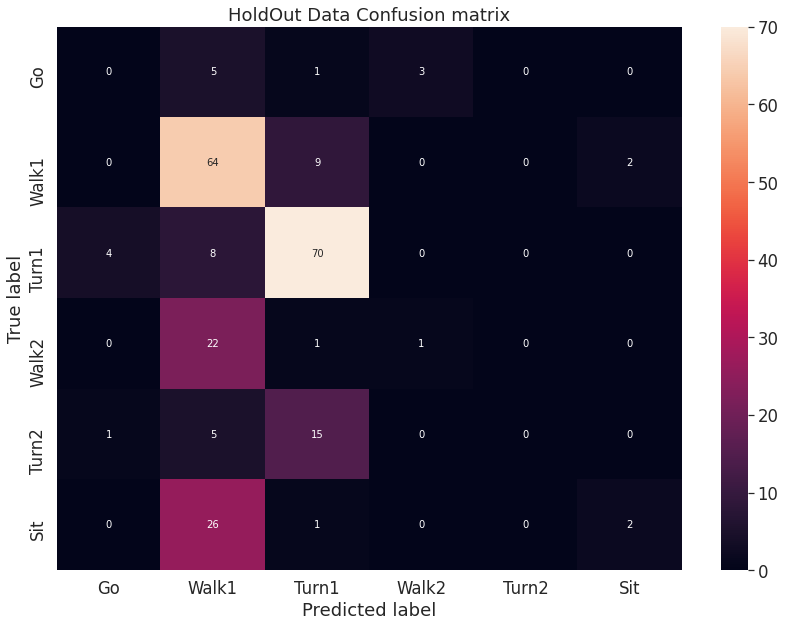


0 = Go 		 1 = Turn 1 	 2 = Turn 2

3 = Walk 1 	 4 = Walk 2 	 5 = Sit
 
['Turn 1' 'Turn 1' 'Turn 1' 'Walk 1' 'Walk 1' 'Turn 2' 'Turn 1' 'Turn 1'
 'Walk 1' 'Walk 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1'
 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1'
 'Turn 1' 'Turn 2' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1'
 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1'
 'Turn 2' 'Turn 2' 'Turn 2' 'Turn 1' 'Turn 2' 'Turn 1' 'Turn 1' 'Turn 1'
 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 2' 'Turn 1' 'Turn 1'
 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1'
 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1'
 'Turn 1' 'Turn 1' 'Turn 2' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1'
 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1'
 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1'
 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 

In [ ]:
holdout_checker_knn()